## Import Required Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import LabelEncoder , OneHotEncoder


disease_types = os.listdir('PlantVillage')
print (disease_types)  

print("Types of diseases found: ", len(disease_types))

['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight']
Types of diseases found:  3


## Storing the data in diseases Array 

In [2]:
diseases = []

for item in disease_types:
    # Get all the file names
    all_diseases = os.listdir('PlantVillage' + '/' +item)
    #print(all_shoes)
    
    # Add them to the list
    for disease in all_diseases:
        diseases.append((item, str('PlantVillage' + '/' +item) + '/' + disease))
        print(diseases[:1])

[('Potato___Early_blight', 'PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')]
[('Potato___Early_blight', 'PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')]
[('Potato___Early_blight', 'PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')]
[('Potato___Early_blight', 'PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')]
[('Potato___Early_blight', 'PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')]
[('Potato___Early_blight', 'PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')]
[('Potato___Early_blight', 'PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')]
[('Potato___Early_blight', 'PlantVillage/Potato___Early_blight/001187a0-57ab-4329-baff-e7246a9edeb0___RS_Early.B 8178.JPG')]


## Converting diseases array into dataframe

In [3]:
diseases_df = pd.DataFrame(data=diseases, columns=['disease type', 'image'])
print(diseases_df.head())
print(diseases_df.tail())

            disease type                                              image
0  Potato___Early_blight  PlantVillage/Potato___Early_blight/001187a0-57...
1  Potato___Early_blight  PlantVillage/Potato___Early_blight/002a55fb-7a...
2  Potato___Early_blight  PlantVillage/Potato___Early_blight/009c8c31-f2...
3  Potato___Early_blight  PlantVillage/Potato___Early_blight/00d8f10f-50...
4  Potato___Early_blight  PlantVillage/Potato___Early_blight/0182e991-97...
              disease type                                              image
2147  Potato___Late_blight  PlantVillage/Potato___Late_blight/fe9d57f1-8e0...
2148  Potato___Late_blight  PlantVillage/Potato___Late_blight/feefc118-443...
2149  Potato___Late_blight  PlantVillage/Potato___Late_blight/ff03a125-445...
2150  Potato___Late_blight  PlantVillage/Potato___Late_blight/ff7160f9-f8d...
2151  Potato___Late_blight  PlantVillage/Potato___Late_blight/fff55a7e-2f8...


## Length of the dataset

In [4]:
len(diseases_df)

disease_count = diseases_df['disease type'].value_counts()

print(disease_count)

Potato___Early_blight    1000
Potato___Late_blight     1000
Potato___healthy          152
Name: disease type, dtype: int64


## Converting images into arrays

In [5]:
import cv2
path = 'PlantVillage/'


#im_size = 100
im_size = 300

images = []
labels = []

for i in disease_types:
    data_path = path + str(i) 
    filenames = [i for i in os.listdir(data_path) ]
   
    for f in filenames:
        img = cv2.imread(data_path + '/' + f)  # reading that image as array
        #print(img)  # will get the image as an array
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

## Finding shape of the array

In [6]:
images = np.array(images)

images = images.astype('float32') / 255.0

images.shape

(2152, 300, 300, 3)

## Extracting output data

In [7]:
y=diseases_df['disease type'].values
print(y[:5])

['Potato___Early_blight' 'Potato___Early_blight' 'Potato___Early_blight'
 'Potato___Early_blight' 'Potato___Early_blight']


## Converting Labels to numeric form

In [8]:
# for y
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

[0 0 0 ... 1 1 1]


## Splitting the data into training and testing data

In [9]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images, y = shuffle(images, y, random_state=1)

train_x, test_x, train_y, test_y = train_test_split(images, y, test_size=0.05, random_state=415)

#inpect the shape of the training and testing.
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(2044, 300, 300, 3)
(2044,)
(108, 300, 300, 3)
(108,)


## Build the model

In [10]:
# Develop a sequential model using tensorflow keras
import keras
import tensorflow as tf
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(300,300,3)),
    keras.layers.Dense(256, activation=tf.nn.tanh),
   
    keras.layers.Dense(5, activation=tf.nn.softmax)
])

## Summary of the model

In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 270000)            0         
                                                                 
 dense (Dense)               (None, 256)               69120256  
                                                                 
 dense_1 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 69,121,541
Trainable params: 69,121,541
Non-trainable params: 0
_________________________________________________________________


## Compilation of the Model

In [13]:
model.compile(optimizer=tf.optimizers.Adam(), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Fit the model

In [14]:
history = model.fit(train_x, train_y, epochs=10, 
          validation_split=0.2)

Epoch 1/10
52/52 [==============================] - 23s 413ms/step - loss: 1.7098 - accuracy: 0.4575 - val_loss: 1.4179 - val_accuracy: 0.4523
Epoch 2/10
52/52 [==============================] - 18s 341ms/step - loss: 0.9767 - accuracy: 0.4716 - val_loss: 0.9337 - val_accuracy: 0.4523
Epoch 3/10
52/52 [==============================] - 17s 319ms/step - loss: 0.8993 - accuracy: 0.4691 - val_loss: 0.9360 - val_accuracy: 0.4523
Epoch 4/10
52/52 [==============================] - 17s 320ms/step - loss: 0.9000 - accuracy: 0.4667 - val_loss: 0.9373 - val_accuracy: 0.4523
Epoch 5/10
52/52 [==============================] - 17s 319ms/step - loss: 0.8999 - accuracy: 0.4771 - val_loss: 0.9296 - val_accuracy: 0.4523
Epoch 6/10
52/52 [==============================] - 17s 322ms/step - loss: 0.8984 - accuracy: 0.4765 - val_loss: 0.9490 - val_accuracy: 0.4523
Epoch 7/10
52/52 [==============================] - 17s 320ms/step - loss: 0.9016 - accuracy: 0.4471 - val_loss: 0.9358 - val_accuracy: 0.4523

## Evaluate the model

In [15]:
results = model.evaluate(test_x,  test_y, verbose = 0)
print('test loss, test acc:', results)

test loss, test acc: [0.9053388237953186, 0.48148149251937866]


## Plot the model

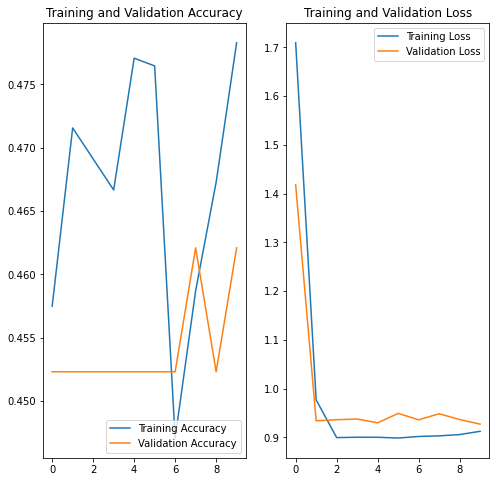

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']


plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(10), acc, label='Training Accuracy')
plt.plot(range(10), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(10), loss, label='Training Loss')
plt.plot(range(10), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()